# Bank Churn Pridection
**Authar** : Hamza hayat

**Linkdin** : https://www.linkedin.com/in/hamza-hayat-7888b737b/

**GitHub** : https://github.com/HAMZAARSHID123925

**Date** : 11/12/2025

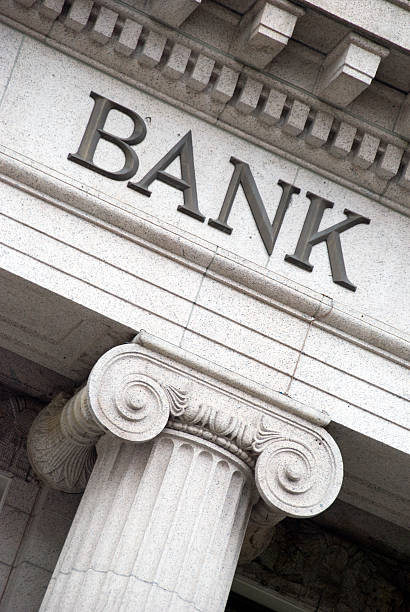

# AIM : `we will classifiy the customers who will stay in our bank or leave the bank`

# Data Description:

**Customer ID**   : A unique identifier for each customer

**Surname**     : The customer's surname or last name

**Credit Score**    : A numerical value representing the customer's credit score

**Geography**     : The country where the customer resides

**Gender**    : The customer's gender

**Age**      : The customer's age.

**Tenure**      : The number of years the customer has been with the bank

**Balance**     : The customer's account balance

**NumOfProducts**     : The number of bank products the customer uses (e.g., savings account, credit card)

**HasCrCard**     : Whether the customer has a credit card

**IsActiveMember**     : Whether the customer is an active member

**EstimatedSalary**      : The estimated salary of the customer

**Exited**     : Whether the customer has churned (Target Variable)

In [1]:
# impoting the libraries
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
# for neural network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# conecting the notebook to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the data set
train_data = ('/content/drive/MyDrive/bank_train.csv')
test_data = ('/content/drive/MyDrive/bank_test.csv')
submission_data = ('/content/drive/MyDrive/bank_sample_submission.csv')
# reading all files by csv
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)
submission_df = pd.read_csv(submission_data)

In [4]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
df = train_df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


- total enteries in the data set is 165034
- total number of columns is 14
- In our dataset, there are **5 columns of float type** and **6 columns of integer type**.
- There are **3 columns of object type** in the dataset.


In [7]:
# loking for null values
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


no null values in the data

In [8]:
# statistic summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [9]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
# find the unique values
for col in cat_cols:
  print(df[col].value_counts())

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
Gender
Male      93150
Female    71884
Name: count, dtype: int64
Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64
NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64
HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64
IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64
Exited
0    130113
1     34921
Name: count, dtype: int64


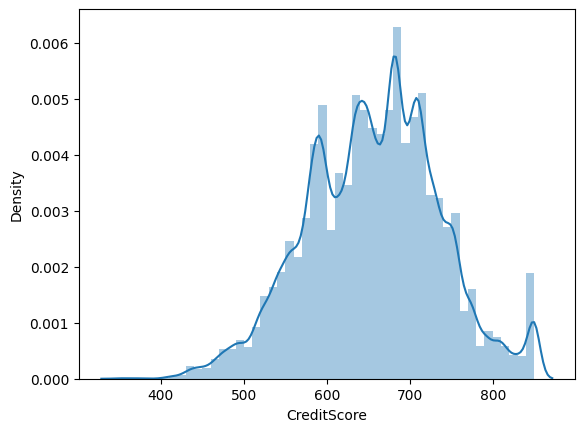

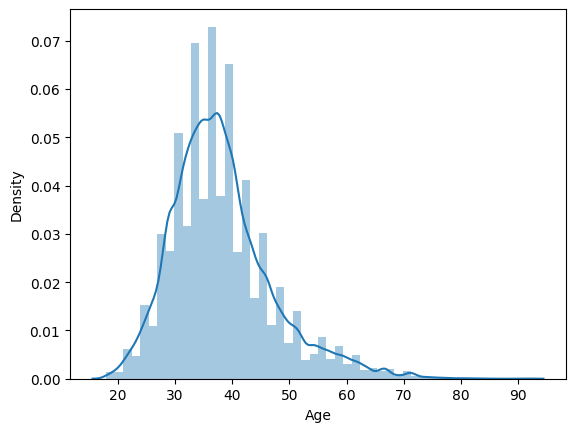

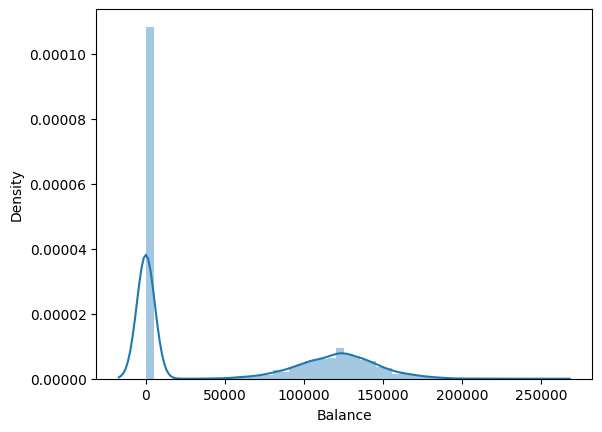

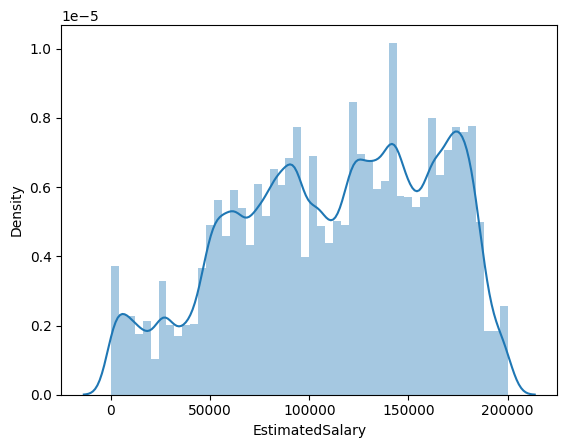

In [11]:
# distribution of numeric column
for col in num_cols:
  sns.distplot(df[col],kde=True)
  plt.show()

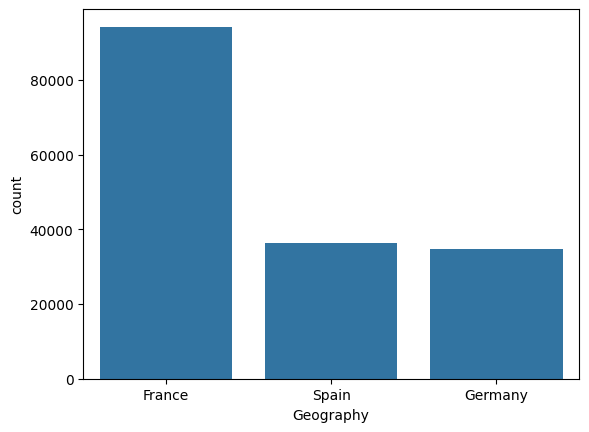

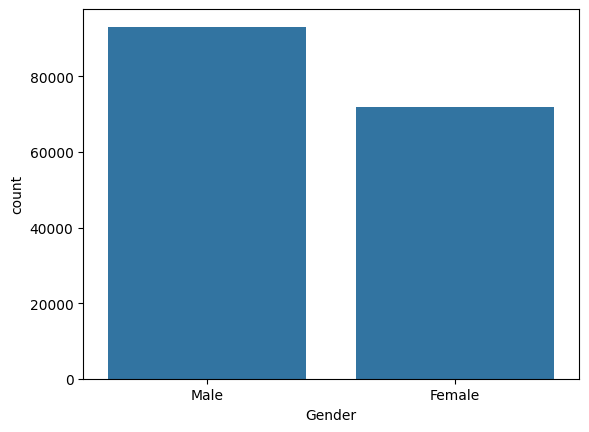

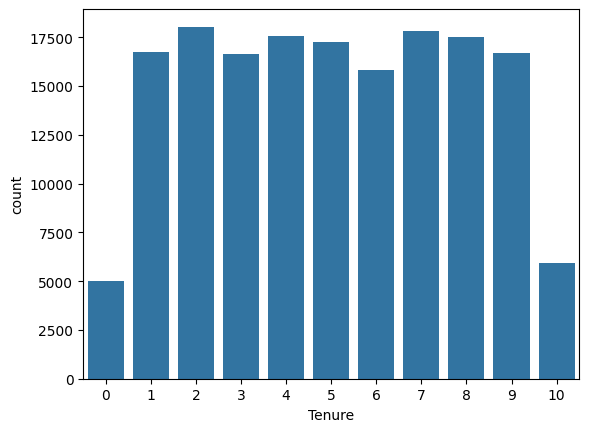

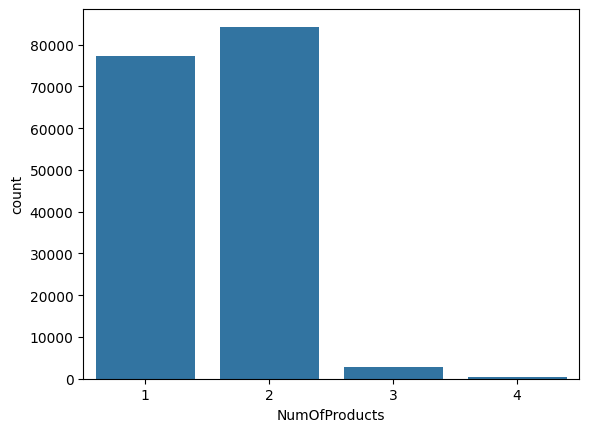

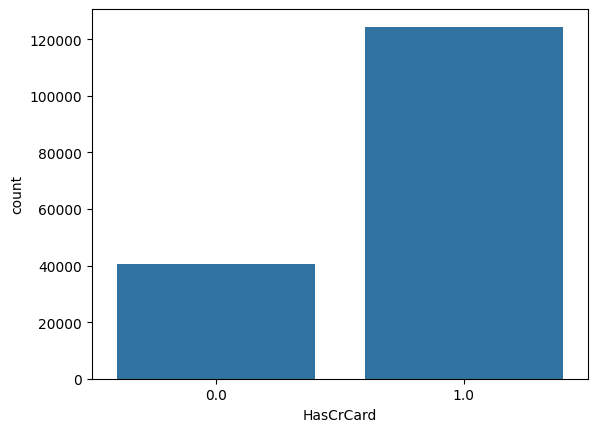

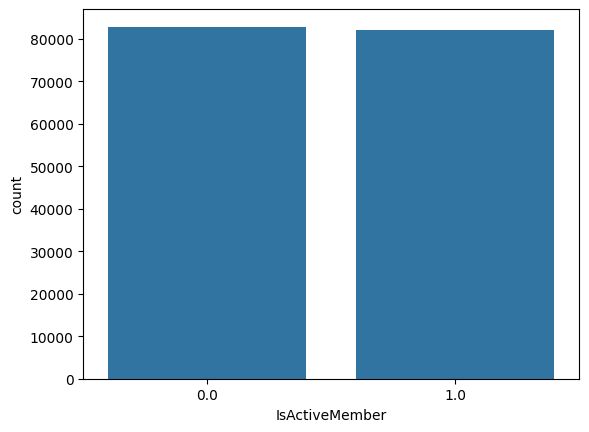

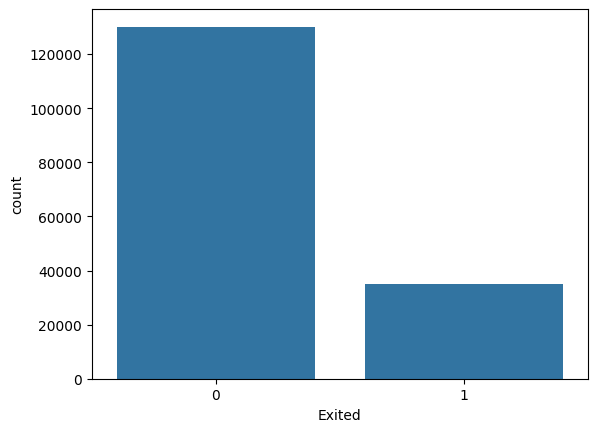

In [12]:
# creating a bar plot of all catagorical columns
for col in cat_cols:
    sns.countplot(df,x = df[col])
    plt.show()

In [13]:
# shape of the data
print(f'the shape of the train data is {df.shape}')

the shape of the train data is (165034, 14)


In [14]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Encoding of Catgorical columns


In [15]:
# using for loop for encoding
for col in cat_cols:
  if df[col].dtype == 'catagorical' or df[col].dtype == 'object':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [16]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
# scaling these two columns Balance ,, EstimatedSalary
sc = StandardScaler()
df['Balance'] = sc.fit_transform(df[['Balance']])
df['EstimatedSalary'] = sc.fit_transform(df[['EstimatedSalary']])

In [17]:
X = df.drop(['Exited','id','Surname','CustomerId'],axis=1)
y = df['Exited']

In [18]:
# spliting teh data into x_train and y_tain
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Neural Network Architecture

Epoch 1/100
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7825 - loss: 0.5135 - val_accuracy: 0.8198 - val_loss: 0.4255
Epoch 2/100
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8110 - loss: 0.4358 - val_accuracy: 0.8069 - val_loss: 0.4441
Epoch 3/100
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8184 - loss: 0.4213 - val_accuracy: 0.8242 - val_loss: 0.4198
Epoch 4/100
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8222 - loss: 0.4135 - val_accuracy: 0.8330 - val_loss: 0.4071
Epoch 5/100
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8245 - loss: 0.4111 - val_accuracy: 0.8309 - val_loss: 0.4034
Epoch 6/100
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8268 - loss: 0.4094 - val_accuracy: 0.8341 - val_loss: 0.3980
Epoch 7/100
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8268 - loss: 0.4037 - val_accuracy: 0.8331 - val_loss: 0.3948
Epoch 8/100
3301/3301 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8266 - l

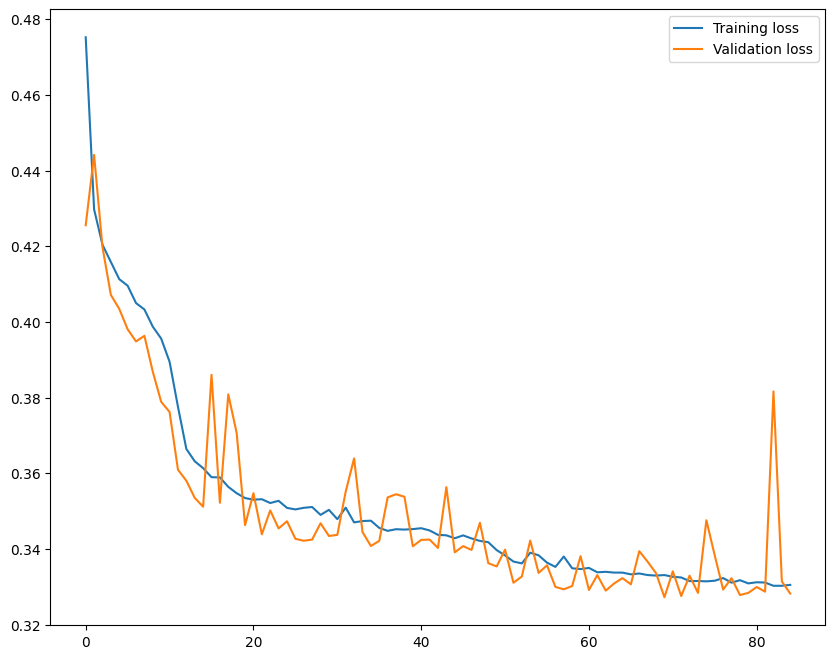

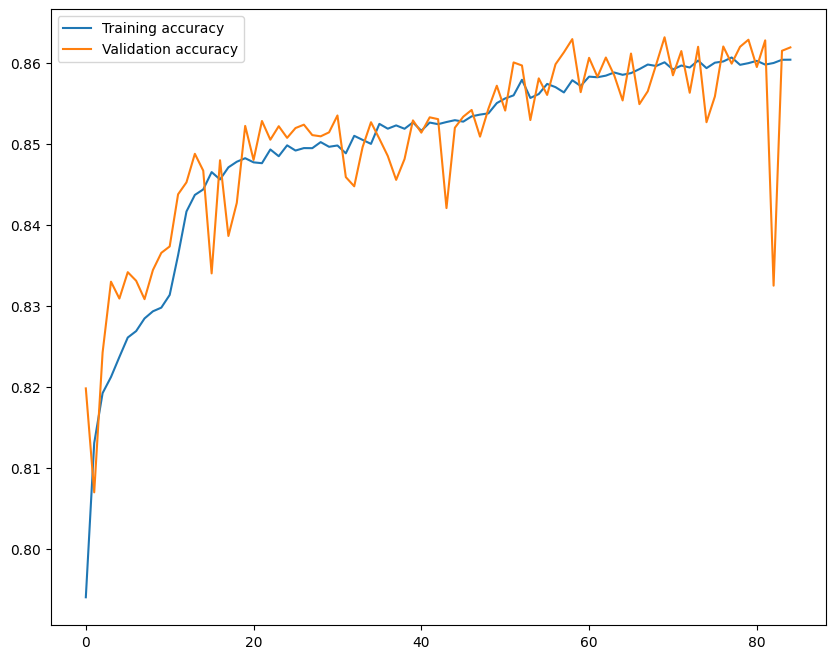

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8632 - loss: 0.3238
the accuracy of the neural network is 0.8628169894218445
CPU times: user 15min 28s, sys: 39.7 s, total: 16min 8s
Wall time: 13min 43s


In [20]:
%%time
from keras.src import activations
# building neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# using early stoping
early_stopping = EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True)
# compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# fitting the model
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2,verbose=1,callbacks=[early_stopping])
# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()
# printing the accuracy of the neural network
print(f'the accuracy of the neural network is {model.evaluate(X_test,y_test)[1]}')

# XGB classifier

accuracy score is 0.8650286302905444
confusion matrix is [[24637  1415]
 [ 3040  3915]]
classification report is               precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.73      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.81      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



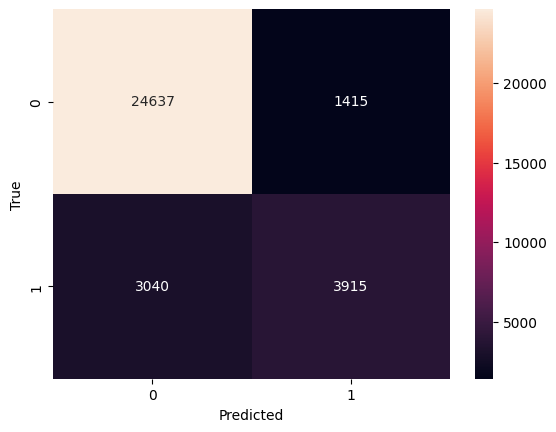

In [21]:
# importing XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
# pridecting
y_pred = xgb.predict(X_test)
# evaluating the model
print(f'accuracy score is {accuracy_score(y_test,y_pred)}')
print(f'confusion matrix is {confusion_matrix(y_test,y_pred)}')
print(f'classification report is {classification_report(y_test,y_pred)}')
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Best Model
Based on accuracy, we selected **XGBoost** as the best model.
